<a href="https://colab.research.google.com/github/Gingercapo/Fuel_Economy/blob/main/fuel_Economic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
# importing numpy libray
from numpy.ma.core import power
import numpy as np
import seaborn as sb
%matplotlib inline


In [3]:
# Read my data from a url 
df = pd.read_csv("/content/fuel-econ.csv")
df.head(2)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6


# Scatter Plot
- A scatterplot is used to show the relationship between two quantitative variables. The two variables are indicated on X and Y-axis, respectively. Through the scatterplots, we can see clearly how these two variables correlate with each other.

Example 1 b. Scatter plot showing negative correlation between two variables
- In this example, **the relationship between the two variables is negative** because as higher values of the x-axis variable are increasing, the values of the variable plotted on the y-axis are decreasing.

Text(0, 0.5, 'Combined Fuel efficieny (mpg)')

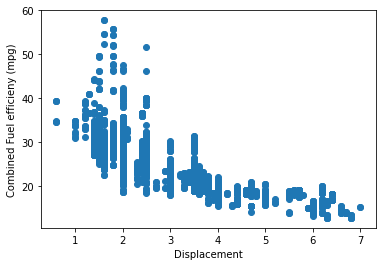

In [4]:
# Scatter plot for the data we want to plot
plt.scatter(data = df, x = "displ", y = "comb");
plt.xlabel("Displacement")
plt.ylabel("Combined Fuel efficieny (mpg)")

# Alternative Approach
## Using seaborn.regplot()
Seaborn's regplot() function combines scatterplot creation with regression function fitting:
Example 1 b. Scatter plot showing negative correlation between two variables
- In the example above, **the relationship between the two variables is negative** because as higher values of the x-axis variable are increasing, the values of the variable plotted on the y-axis are decreasing.

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

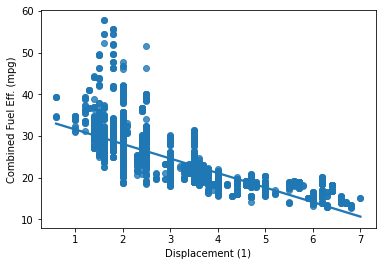

In [5]:
sb.regplot(data = df, x = 'displ', y = 'comb');
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

# Plot the regression line on the transformed data
In this example, the x- and y- values sent to regplot are set directly as Series, extracted from the dataframe.

In [6]:
# Function that extract data and plot using log or power
def log_trans(x, inverse=False):
  if not inverse:
    return np.log10(x)
  else:
    return np.power(x,10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


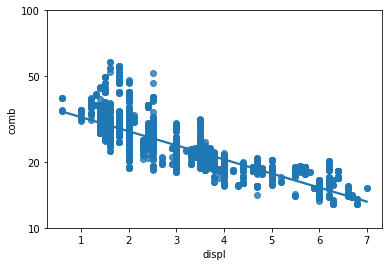

In [9]:
# using 
sb.regplot(df['displ'], df['comb'].apply(log_trans))
tick_locs = [10, 20, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs);

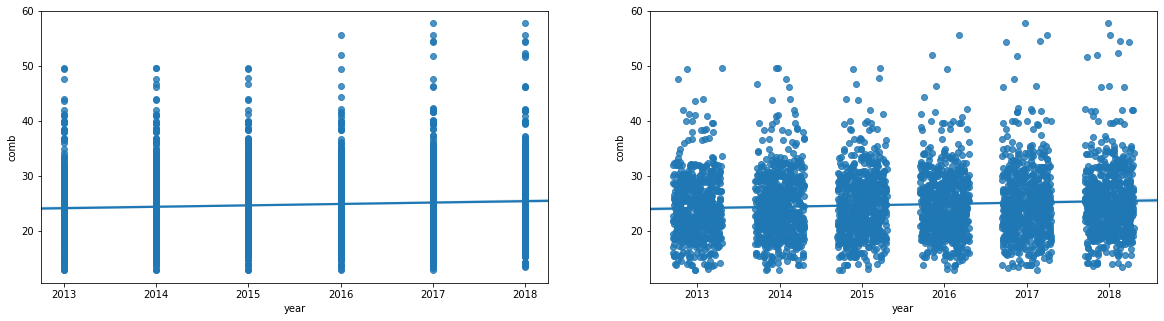

In [26]:
##########################################
# Resize figure to accommodate two plots
plt.figure(figsize = [20, 5])

# PLOT ON LEFT - SIMPLE SCATTER
plt.subplot(1, 2, 1)
sb.regplot(data = df, x = 'year', y = 'comb', truncate=False);

##########################################
# PLOT ON RIGHT - SCATTER PLOT WITH JITTER
plt.subplot(1, 2, 2)
# In the sb.regplot() function below, the `truncate` argument accepts a boolean.
# If truncate=True, the regression line is bounded by the data limits. 
# Else if truncate=False, it extends to the x axis limits.
# The x_jitter will make each x value will be adjusted randomly by +/-0.3
sb.regplot(data = df, x = 'year', y = 'comb', truncate=False, x_jitter=0.3);

# Plot with both Jitter and Transparency
The scatter_kws helps specifying the opaqueness of the data points.


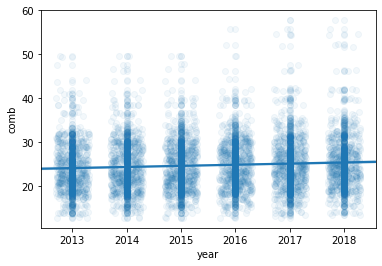

In [27]:
# The scatter_kws helps specifying the opaqueness of the data points. 
# The alpha take a value between [0-1], where 0 represents transparent, and 1 is opaque. 
sb.regplot(data = df, x = 'year', y = 'comb', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});

# Alternative way to plot with the transparency.
# The scatter() function below does NOT have any argument to specify the Jitter
plt.scatter(data = df, x = 'year', y = 'comb', alpha=1/20);